# In-Class Quiz Nº 4

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q4.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
import pickle
#for those who have the GPU enable, maybe uncomment the next lines
#gp=tf.config.list_physical_devices('GPU')
#print(gp)
#tf.config.experimental.set_memory_growth(gp[0],True)

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1
X2=D.X2
y1=D.y1
y2=D.y2
#print(X1.shape,X2.shape)

X1=X1/255.
X2=X2/255.
X1=X1.reshape(-1,28,28,1)
X2=X2.reshape(-1,28,28,1)
y1=keras.utils.to_categorical(y1)
y2=keras.utils.to_categorical(y2)
print(X1.shape)
print(X2.shape)
print(y1.shape)
print(y2.shape)

(10000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 10)
(5000, 10)


# Question 1: 
##  Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
## - Use 6 convolutional layers
## - Use 3 pooling layers
## - DO NOT use data augmentation
## - Obtain in the test set an accuracy equal or above 90%
###  Build this network, compile and train the network using the kMNIST training set. Also include the test data as the validation set during training.
###  Plot the  the losses and the accuracies curves for the training and validation sets during the training process.  Comment the results. Print the total number of errors and the confusion matrix for the test dataset.

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
lenet5 = models.Sequential()
lenet5.add(layers.Conv2D(64, (10, 10), activation='relu', input_shape=(28, 28, 1),padding="same"))
lenet5.add(layers.Conv2D(84, (5, 5), activation='relu'))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(100, (2, 2), activation='relu'))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(120, (2, 2), activation='relu'))
# lenet5.add(layers.Conv2D(16, (5, 5), activation='relu'))
# lenet5.add(layers.Conv2D(16, (2, 2), activation='relu'))
# lenet5.add(layers.AveragePooling2D((2, 2)))
# lenet5.add(layers.Conv2D(200, (2, 2), activation='relu'))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(200, (2, 2), activation='relu'))
lenet5.add(layers.Conv2D(200, (1, 1), activation='relu'))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(84, activation='relu'))
lenet5.add(layers.Dense(10, activation='softmax'))
lenet5.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        6464      
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 84)        134484    
                                                                 
 average_pooling2d_3 (Averag  (None, 12, 12, 84)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 100)       33700     
                                                                 
 average_pooling2d_4 (Averag  (None, 5, 5, 100)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 120)        

In [114]:
lenet5.compile(optimizer="nadam",loss="categorical_crossentropy",metrics=["accuracy"])
tLog = lenet5.fit(X1, y1, epochs=20,batch_size=1024,validation_data=(X2, y2))

Epoch 1/20
10/10 [==============================] - 45s 4s/step - loss: 2.1857 - accuracy: 0.1924 - val_loss: 2.0276 - val_accuracy: 0.3306
Epoch 2/20
10/10 [==============================] - 45s 5s/step - loss: 1.8242 - accuracy: 0.3963 - val_loss: 1.7931 - val_accuracy: 0.3506
Epoch 3/20
10/10 [==============================] - 48s 5s/step - loss: 1.4932 - accuracy: 0.4944 - val_loss: 1.5860 - val_accuracy: 0.4630
Epoch 4/20
10/10 [==============================] - 46s 5s/step - loss: 1.2103 - accuracy: 0.5934 - val_loss: 1.5008 - val_accuracy: 0.5116
Epoch 5/20
10/10 [==============================] - 46s 5s/step - loss: 0.9951 - accuracy: 0.6790 - val_loss: 1.2979 - val_accuracy: 0.5748
Epoch 6/20
10/10 [==============================] - 46s 5s/step - loss: 0.8298 - accuracy: 0.7245 - val_loss: 1.1635 - val_accuracy: 0.6192
Epoch 7/20
10/10 [==============================] - 47s 5s/step - loss: 0.7593 - accuracy: 0.7523 - val_loss: 1.1335 - val_accuracy: 0.6420
Epoch 8/20
10/10 [==

In [10]:
Y2e=lenet5.predict(X2)
print(y2e[0:10])
y2e=np.argmax(Y2e,axis=1)
y2a=np.argmax(y2,axis=1)
print(y2e[0])
# print(y2a[1000:1100])
# print(y2e.shape)
# print(y2.shape)
print(confusion_matrix(y2a,y2e))
print('Score:',np.sum(y2a==y2e)/y2a.shape[0]*100)
print('Number of erros:', np.sum(y2a!=y2e))

[2 3 2 5 5 2 2 5 7 5]
2
[[  0   0  89  97   6 279   0  29   0   0]
 [  0   0 386   0   2  91   0  21   0   0]
 [  0   0 310   1   0 124   0  65   0   0]
 [  0   0 302  12  46  55   0  85   0   0]
 [  0   0 330  12   1  88   0  69   0   0]
 [  0   0 204  51  27 127   0  91   0   0]
 [  0   0 455   0   1  25   0  19   0   0]
 [  0   0 255   0  17 175   1  52   0   0]
 [  0   0 310  14   2 152   0  22   0   0]
 [  0   0 268   0  10 142   0  80   0   0]]
Score: 10.040000000000001
Number of erros: 4498


(0.0, 19.0, 0.0, 2.0)

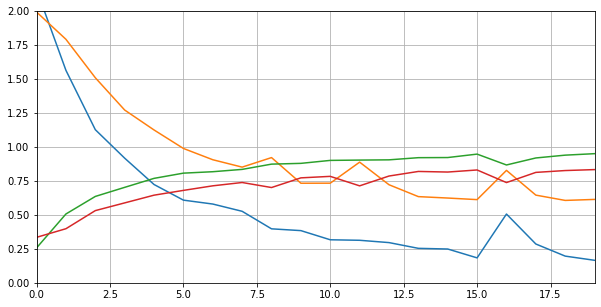

In [77]:
h=tLog.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,19,0,2])

# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the kMNIST dataset. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Pre-process the data so it can be used by the network.
### c)  Train the network for 25 epochs and show the results. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [5]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1
X2=D.X2
y1=D.y1
y2=D.y2


## 2.a)

## 2.b)

## 2.c)

<hr style="border:2px solid black"> </hr>

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsSmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 1000 images of cats and 1000 images of dogs
## The test data consists of 500 images of cats and 500 images of dogs
## The images have various sizes

# Question 3:
## Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
### a)  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN.
### b)  Using the $\texttt{ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation. Note: rescale the generated images so that its pixel values are between 0 and 255.
### c)  Train the network for 25 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the $\texttt{steps_per_epoch}$ and the $\texttt{validation_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.

## 3.a)

## 3.b)

## 3.c)